In [1]:
import torch

In [2]:
# Copy the git repository
!git clone https://github.com/atulgupta01/ERA_Repo.git

fatal: destination path 'ERA_Repo' already exists and is not an empty directory.


In [3]:
!pip install grad-cam

In [4]:
#import from git modules

from ERA_Repo.model.resnet import ResNet18
from ERA_Repo.Main import get_cifar_data, train_val_seq, get_optimizer, get_scheduler, \
get_epochs
from ERA_Repo.util import lr_range_checker, train_transforms, test_transforms, \
get_model_summary, accuracy_plot, plot_error, get_error_images, plot_gradcam_images

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
!pip install torchsummary

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = get_model_summary (ResNet18, device, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
train_loader, test_loader = get_cifar_data(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.08E-02


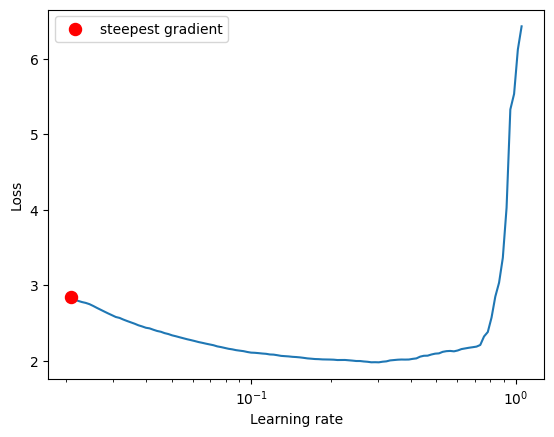

In [9]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = get_optimizer("ADAM", model, 0.015, 1e-4)
lr_range_checker(model, train_loader, optimizer, criterion)

In [10]:
MAX_LR = 2.08E-02
steps_per_epoch = len(train_loader)
anneal_strategy = 'linear'

scheduler = get_scheduler("OneCycle", optimizer, MAX_LR, steps_per_epoch, get_epochs(), anneal_strategy)

train_losses, test_losses, train_acc, test_acc, lrs = train_val_seq(model,
                    device,
                    train_loader,
                    test_loader,
                    optimizer,
                    scheduler,
                    criterion,
                    20)


EPOCH: 0


Loss=1.1944268941879272 Batch_id=97 Accuracy=45.28 LR=0.00433482208588957: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.0031, Accuracy: 4997/10000 (49.97%)

EPOCH: 1


Loss=0.9979056119918823 Batch_id=97 Accuracy=59.56 LR=0.00846164417177914: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0031, Accuracy: 5528/10000 (55.28%)

EPOCH: 2


Loss=0.9108985662460327 Batch_id=97 Accuracy=66.74 LR=0.01258846625766871: 100%|██████████| 98/98 [00:47<00:00,  2.06it/s]



Test set: Average loss: 0.0023, Accuracy: 6339/10000 (63.39%)

EPOCH: 3


Loss=0.8159087300300598 Batch_id=97 Accuracy=71.16 LR=0.01671528834355828: 100%|██████████| 98/98 [00:47<00:00,  2.08it/s]



Test set: Average loss: 0.0030, Accuracy: 5160/10000 (51.60%)

EPOCH: 4


Loss=0.8321793079376221 Batch_id=97 Accuracy=73.57 LR=0.02078585175510204: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0025, Accuracy: 5973/10000 (59.73%)

EPOCH: 5


Loss=0.6699542999267578 Batch_id=97 Accuracy=74.68 LR=0.01939932375510204: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]



Test set: Average loss: 0.0022, Accuracy: 6551/10000 (65.51%)

EPOCH: 6


Loss=0.7154607772827148 Batch_id=97 Accuracy=76.84 LR=0.01801279575510204: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0026, Accuracy: 6328/10000 (63.28%)

EPOCH: 7


Loss=0.6558982729911804 Batch_id=97 Accuracy=78.38 LR=0.01662626775510204: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0013, Accuracy: 7753/10000 (77.53%)

EPOCH: 8


Loss=0.6204180717468262 Batch_id=97 Accuracy=79.39 LR=0.015239739755102042: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0017, Accuracy: 7116/10000 (71.16%)

EPOCH: 9


Loss=0.5277366042137146 Batch_id=97 Accuracy=80.64 LR=0.01385321175510204: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0016, Accuracy: 7515/10000 (75.15%)

EPOCH: 10


Loss=0.4766150116920471 Batch_id=97 Accuracy=81.66 LR=0.012466683755102041: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0014, Accuracy: 7706/10000 (77.06%)

EPOCH: 11


Loss=0.6008957028388977 Batch_id=97 Accuracy=82.57 LR=0.011080155755102041: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0015, Accuracy: 7605/10000 (76.05%)

EPOCH: 12


Loss=0.414643794298172 Batch_id=97 Accuracy=83.05 LR=0.00969362775510204: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0011, Accuracy: 8025/10000 (80.25%)

EPOCH: 13


Loss=0.482449471950531 Batch_id=97 Accuracy=84.76 LR=0.008307099755102042: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0012, Accuracy: 8090/10000 (80.90%)

EPOCH: 14


Loss=0.3922688961029053 Batch_id=97 Accuracy=85.53 LR=0.006920571755102042: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]



Test set: Average loss: 0.0011, Accuracy: 8213/10000 (82.13%)

EPOCH: 15


Loss=0.3841550946235657 Batch_id=97 Accuracy=86.87 LR=0.005534043755102042: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0009, Accuracy: 8455/10000 (84.55%)

EPOCH: 16


Loss=0.391964316368103 Batch_id=97 Accuracy=88.14 LR=0.004147515755102041: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0008, Accuracy: 8705/10000 (87.05%)

EPOCH: 17


Loss=0.40609872341156006 Batch_id=97 Accuracy=89.32 LR=0.002760987755102043: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0007, Accuracy: 8912/10000 (89.12%)

EPOCH: 18


Loss=0.22248724102973938 Batch_id=97 Accuracy=91.60 LR=0.0013744597551020449: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0006, Accuracy: 9052/10000 (90.52%)

EPOCH: 19


Loss=0.21680948138237 Batch_id=97 Accuracy=93.26 LR=-1.2068244897956576e-05: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]



Test set: Average loss: 0.0005, Accuracy: 9206/10000 (92.06%)



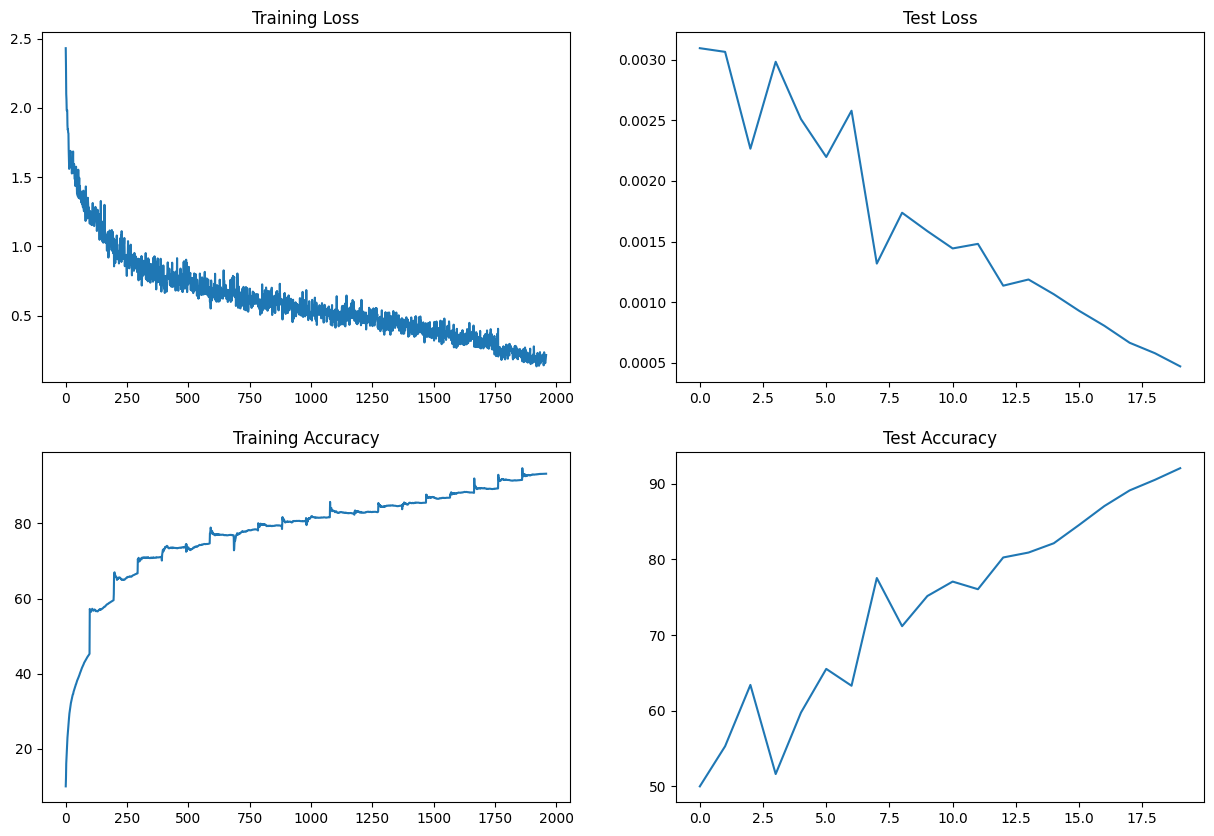

In [11]:
train_loss = torch.tensor(train_losses).cpu().detach().numpy()
accuracy_plot(train_loss,
              test_losses,
              train_acc,
              test_acc)

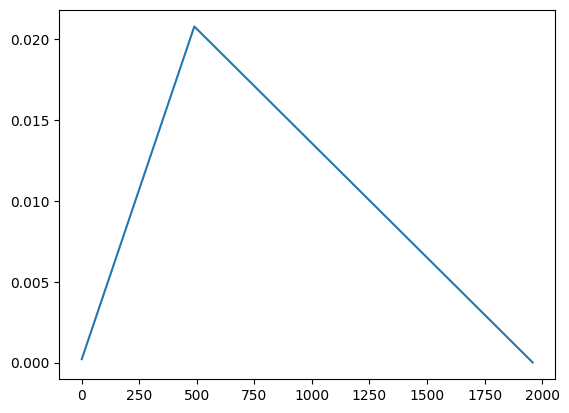

In [12]:
import matplotlib.pyplot as plt
plt.plot(lrs)

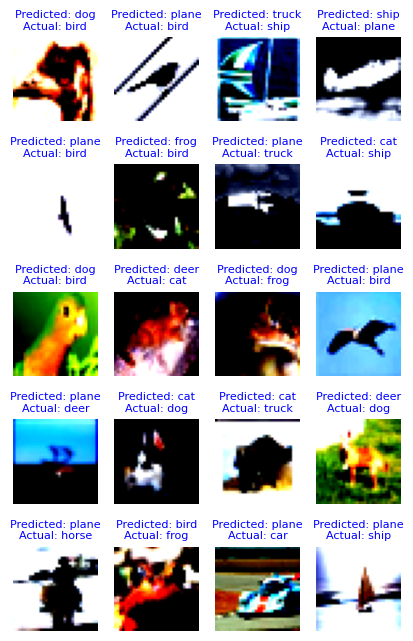

In [13]:
error_images, error_target, error_predicted = get_error_images(model, test_loader, device, 20)
plot_error(error_images, error_target, error_predicted, 5)

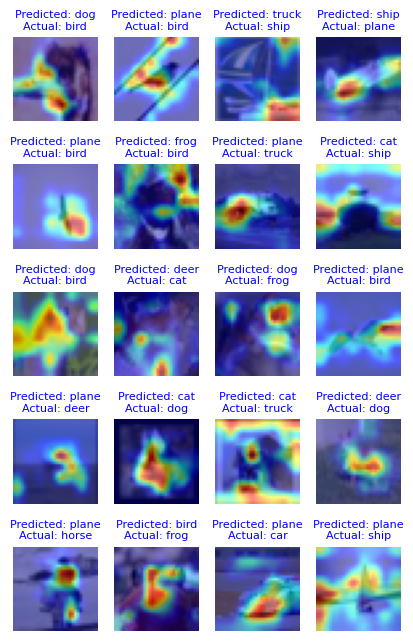

In [14]:
plot_gradcam_images(model, error_images, error_predicted, error_target, 5)